Data sourec : https://www.kaggle.com/grassknoted/asl-alphabet
This notebook is to test the model of 3 layer CNN + MaxPooling with filters 8,16, and 32, trained on new set of train and validation images and tested on the test images.  
This is the third set of cross validation.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

2021-10-12 15:08:10.506581: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [9]:
image_path = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="training",
  seed=423)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="validation",
  seed=423)



Found 87000 files belonging to 29 classes.
Using 65250 files for training.
Found 87000 files belonging to 29 classes.
Using 21750 files for validation.


In [4]:
import glob
import pathlib 

data_dir = pathlib.Path(image_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [5]:
import cv2
import os

test_path = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"
test_class = []
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        test_class.append(filename[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images

pred_images = load_images_from_folder(test_path)
test_class

['A',
 'E',
 'L',
 'N',
 'S',
 'D',
 'G',
 'I',
 'W',
 'M',
 'n',
 'X',
 'H',
 'Q',
 'C',
 'T',
 'P',
 'V',
 'Y',
 'U',
 's',
 'O',
 'B',
 'R',
 'F',
 'Z',
 'J',
 'K']

In [6]:
type(pred_images)

list

In [7]:
pred_images = np.array(pred_images)
pred_images.shape

(28, 224, 224, 3)

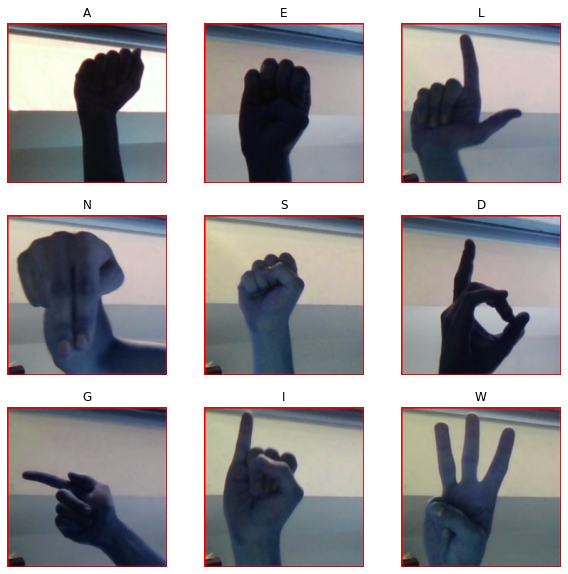

In [10]:
## visualize prediction images 
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pred_images[i])
    plt.title(test_class[i])
    plt.axis("off")

2021-10-12 15:19:49.180643: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-12 15:19:49.185279: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000140000 Hz


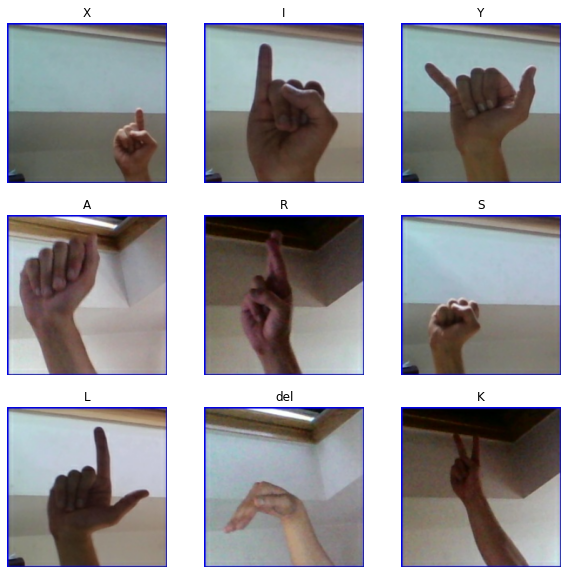

In [11]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

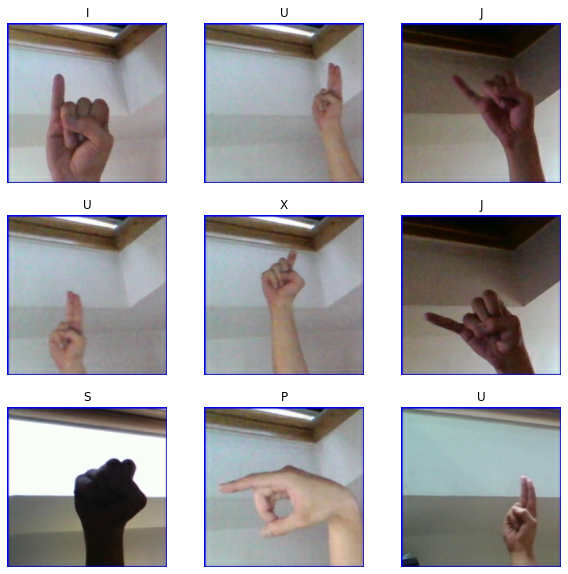

In [12]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Epoch 1/10


2021-10-12 15:26:02.895935: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-12 15:26:03.699028: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-12 15:26:03.728403: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


2040/2040 [==============================] - 490s 237ms/step - loss: 9.9326 - accuracy: 0.5501 - val_loss: 0.3787 - val_accuracy: 0.8700
Epoch 2/10
2040/2040 [==============================] - 147s 72ms/step - loss: 0.1803 - accuracy: 0.9396 - val_loss: 0.2693 - val_accuracy: 0.9223
Epoch 4/10
2040/2040 [==============================] - 146s 71ms/step - loss: 0.1432 - accuracy: 0.9528 - val_loss: 0.1068 - val_accuracy: 0.9704
Epoch 5/10
   1/2040 [..............................] - ETA: 12:10 - loss: 0.0080 - accuracy: 1.0000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2040/2040 [==============================] - 147s 72ms/step - loss: 0.0944 - accuracy: 0.9700 - val_loss: 0.1328 - val_accuracy: 0.9644
Epoch 7/10
1821/2040 [=========================>....] - ETA: 12s - loss: 0.0990 - accuracy: 0.9700

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2040/2040 [==============================] - 150s 73ms/step - loss: 0.0811 - accuracy: 0.9762 - val_loss: 0.1712 - val_accuracy: 0.9613
Epoch 9/10
2040/2040 [==============================] - 149s 73ms/step - loss: 0.0686 - accuracy: 0.9794 - val_loss: 0.2899 - val_accuracy: 0.9288
Epoch 10/10
2040/2040 [==============================] - 148s 73ms/step - loss: 0.0699 - accuracy: 0.9797 - val_loss: 0.1521 - val_accuracy: 0.9632
CPU times: user 19min 21s, sys: 1min 36s, total: 20min 58s
Wall time: 30min 17s
680/680 [==============================] - 34s 50ms/step - loss: 0.1521 - accuracy: 0.9632
Validation image accuracy :0.963172435760498


2021-10-12 15:56:54.822881: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Classification Report
              precision    recall  f1-score   support

           A       0.98      0.95      0.96       709
           B       0.99      0.95      0.97       724
           C       0.99      1.00      1.00       773
           D       0.99      0.97      0.98       761
           E       0.93      0.94      0.93       747
           F       0.94      1.00      0.97       752
           G       1.00      0.96      0.98       746
           H       0.98      0.99      0.99       744
           I       0.97      0.99      0.98       781
           J       0.98      0.99      0.98       746
           K       0.99      0.99      0.99       743
           L       0.98      0.98      0.98       757
           M       0.99      0.93      0.96       732
           N       0.97      0.98      0.98       771
           O       0.98      0.97      0.97       766
           P       0.98      0.94      0.96       758
           Q       0.94      0.98      0.96       765
     

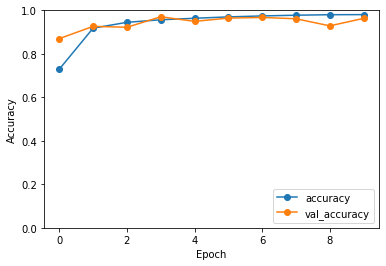

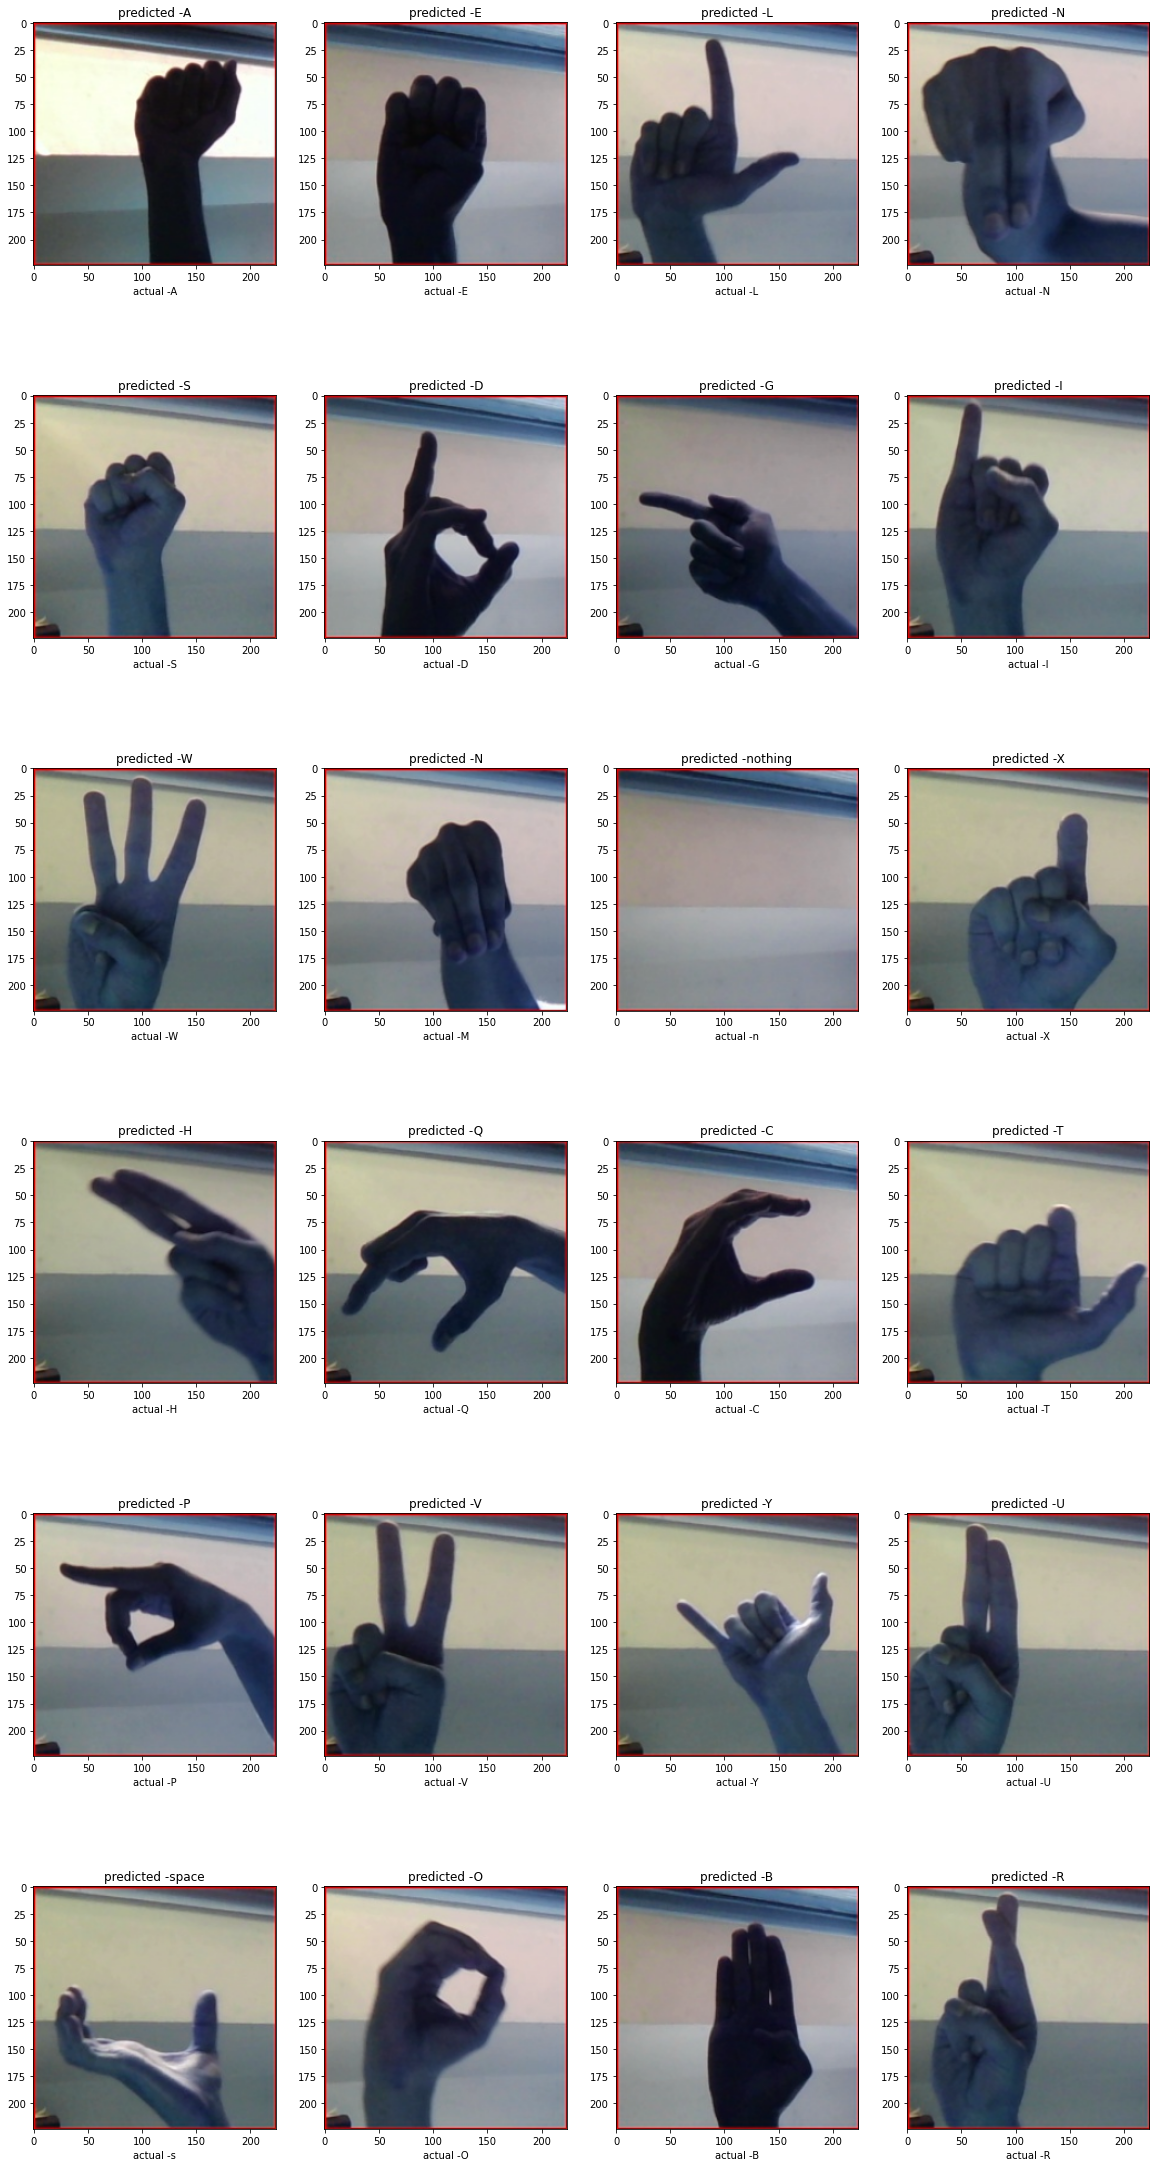

In [13]:
## three layer CNN with lesser filters 

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 3), filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Validation image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn')
#
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])
    

In this cross validation , all the test images have been predicted correctly. 